# *UnsuperVised InsuranceA nalysis*

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

## *Analysis objective :<br> Apply Unsupervised Learning Techniques On Insurance Data*

---

## *A. Importing data*

In [3]:
df=pd.read_csv(r"C:/Users/Omar/Desktop/Omar_Files/Python_Analysis/Auto_Insurance/Data_Sets/data_car.csv")
df.head()

,veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
0,1.06,0.303901,0,0,0.0,HBACK,3,F,C,2,01101 0 0 0
1,1.03,0.648871,0,0,0.0,HBACK,2,F,A,4,01101 0 0 0
2,3.26,0.569473,0,0,0.0,UTE,2,F,E,2,01101 0 0 0
3,4.14,0.317591,0,0,0.0,STNWG,2,F,D,2,01101 0 0 0
4,0.72,0.648871,0,0,0.0,HBACK,4,F,C,2,01101 0 0 0


---

## *B. Data shape :*

In [4]:
df.shape

(67856, 11)

---

## *C. Data info :*

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67856 entries, 0 to 67855
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   veh_value  67856 non-null  float64
 1   exposure   67856 non-null  float64
 2   clm        67856 non-null  int64  
 3   numclaims  67856 non-null  int64  
 4   claimcst0  67856 non-null  float64
 5   veh_body   67856 non-null  object 
 6   veh_age    67856 non-null  int64  
 7   gender     67856 non-null  object 
 8   area       67856 non-null  object 
 9   agecat     67856 non-null  int64  
 10  X_OBSTAT_  67856 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 5.7+ MB


---

## *D. Data Cleaning :*

### *D.1 Removing unnecessary features -(X_OBSTAT ,clm)- :*

In [6]:
df=df.drop(["X_OBSTAT_","clm"],axis=1)


### *D.1 na-values :*

In [7]:
df.isna().sum().sum()
df.isna().sum()

veh_value    0
exposure     0
numclaims    0
claimcst0    0
veh_body     0
veh_age      0
gender       0
area         0
agecat       0
dtype: int64

### *D.2 convert data types :*

In [8]:
df["agecat"]=df["agecat"].astype("object")
df["veh_age"]=df["veh_age"].astype("object")

### *D.3 convert veh_value into correct format :*

In [9]:
df["veh_value"]=df["veh_value"]*10000

### *D.4 Filter veh_value and claimcst0 with more than 0 :*

In [10]:
df=df[df["veh_value"]>0]
df=df[df["claimcst0"]>0]

---

## *E. EDA --Exploration data analysis*

* *Define categorical_columns and numerical_columns :*

In [11]:
categorical_columns =df.select_dtypes(include=['object']).columns.tolist()
numerical_columns =df.select_dtypes(include=['float64','int64']).columns.tolist()

### *E.1 Descriptive Analysis :*

In [12]:
pd.DataFrame(df[numerical_columns].describe())

,veh_value,exposure,numclaims,claimcst0
count,4618.000000,4618.000000,4618.000000,4618.000000
mean,18616.111087,0.610834,1.067345,2013.086464
std,11584.085584,0.261503,0.270592,3547.973696
min,2200.000000,0.002738,1.000000,200.000000
25%,11000.000000,0.410678,1.000000,353.770000
50%,15700.000000,0.636550,1.000000,761.349999
75%,23175.000000,0.832307,1.000000,2090.927497
max,139000.000000,0.999316,4.000000,55922.129883


In [13]:
pd.DataFrame(df[categorical_columns].describe())

,veh_body,veh_age,gender,area,agecat
count,4618,4618,4618,4618,4618
unique,13,4,2,6,6
top,SEDAN,3,F,C,3
freq,1476,1362,2647,1412,1111


### *E.2 Data Visualization :*

---

## *C. Unsupervised Learning :*

### *C.1 Data Preparation :*

* *Define x,y features (The Gender in this case is our target) :*

In [14]:
x=df.drop("gender",axis=1)
y=df["gender"]

* *Define the new categorical_columns and numerical_columns :*

In [15]:
categorical_columns =x.select_dtypes(include=['object']).columns.tolist()
numerical_columns =x.select_dtypes(include=['float64','int64']).columns.tolist()

* *Apply LabelEncoder for the target feature and OneHotEncoder for the input features :*

In [16]:
from sklearn.preprocessing import (LabelEncoder,StandardScaler,OneHotEncoder)
y=LabelEncoder().fit_transform(y)
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(x[categorical_columns])

* *Apply StandardScaler on the numerical_columns :*

In [17]:
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(x[numerical_columns])

* *Combine the scaled_numeric data and the one_hot_encoded data in one data frame :*

In [18]:
scaled_df=pd.concat([pd.DataFrame(scaled_numeric,columns=x.select_dtypes(exclude="object").columns),
           pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))],axis=1)
scaled_df.head()

,veh_value,exposure,numclaims,claimcst0,veh_body_BUS,veh_body_CONVT,veh_body_COUPE,veh_body_HBACK,veh_body_HDTOP,veh_body_MCARA,...,area_C,area_D,area_E,area_F,agecat_1,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6
0,-0.174060,-0.482778,-0.248908,-0.378729,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.303562,1.464795,-0.248908,-0.340083,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.951072,-0.273361,-0.248908,-0.454190,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.024509,0.166413,3.447099,-0.056764,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.897972,0.920312,-0.248908,0.964416,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


### *C.2 Apply Umap for Dimentional Reduction*

* *The umap parameters will be used are : n_neighbors=15, min_dist=0.1, random_state=0,n_components=2*

In [19]:
import umap
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.1, random_state=0,n_components=2)
data_umap = umap_model.fit_transform(scaled_df)

* *Visualizing 2D Umap :*

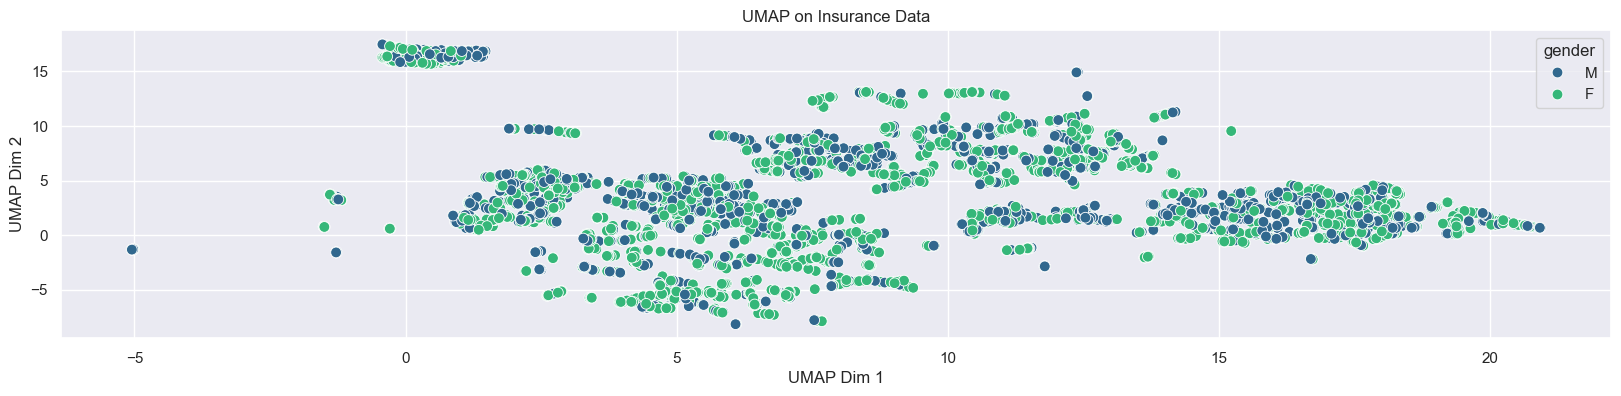

In [20]:
plt.figure(figsize=(20,4))
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=df["gender"], palette="viridis", s=60)
plt.title("UMAP on Insurance Data")
plt.xlabel("UMAP Dim 1")
plt.ylabel("UMAP Dim 2")
plt.show()

### *C.3 Apply KMeans Clustering Learning*

* *Apply Elbow Method for Optimal Number of Clusters on the new data_umap dataset :*

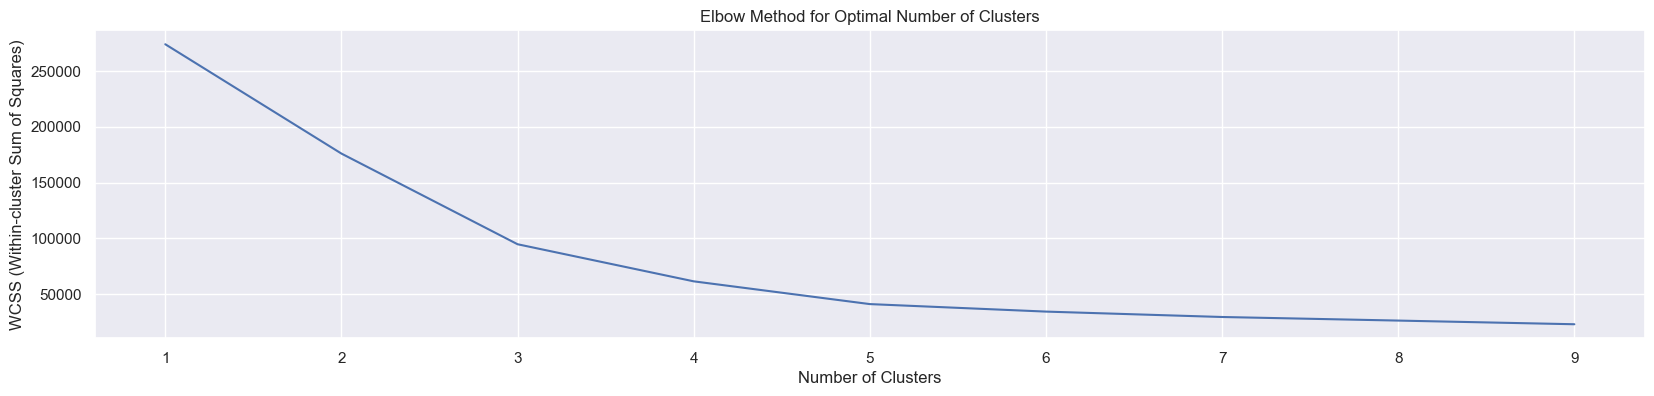

In [46]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_umap)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20, 4))
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Number of Clusters");    

* *Apply KMeans with 3 Clusters :*

In [23]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_umap)

* *Visualizing the 3 clusters on data_umap :*

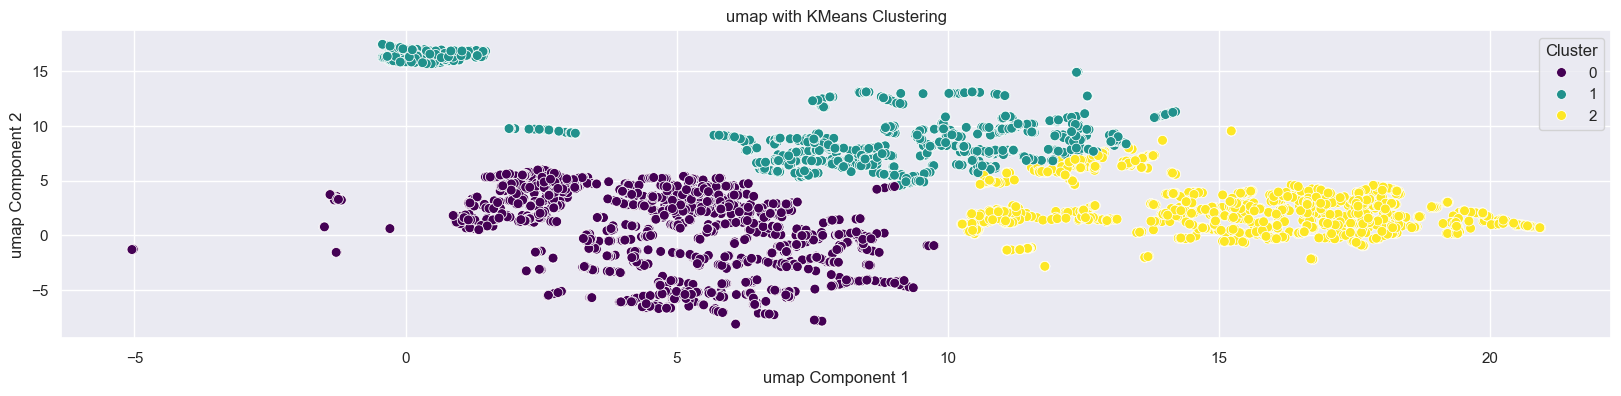

In [47]:
plt.figure(figsize=(20, 4))
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=clusters, palette="viridis", s=50)
plt.title("umap with KMeans Clustering")
plt.xlabel("umap Component 1")
plt.ylabel("umap Component 2")
plt.legend(title="Cluster")
plt.show()

### *C.4 Apply RandomForestClassifier Ml on the new data_umap data :*

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score,roc_auc_score,auc,roc_curve,precision_score,
recall_score,precision_recall_curve,classification_report,
confusion_matrix,f1_score,ConfusionMatrixDisplay
)
from sklearn.model_selection import train_test_split

In [55]:
from imblearn.combine import SMOTETomek,SMOTEENN
smt=SMOTEENN(random_state=42,sampling_strategy="minority")
x_re,y_res=smt.fit_resample(data_umap,y)
x_train, x_test, y_train, y_test = train_test_split(x_re,y_res ,test_size= 0.2,random_state=42)
print("Train data shape of X = % s and Y = % s : "%(
    x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
x_test.shape, y_test.shape))
np.random.seed(42)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)

print("accuracy :" ,accuracy_score(y_test,predicted))
print("precision :" ,precision_score(y_test,predicted))
print("recall" ,recall_score(y_test,predicted))
print("f1" ,f1_score(y_test,predicted))
print("roc_auc" ,roc_auc_score(y_test,predicted) )

Train data shape of X = (1032, 2) and Y = (1032,) : 
Test data shape of X = (258, 2) and Y = (258,) : 
accuracy : 0.9418604651162791
precision : 0.9262295081967213
recall 0.9495798319327731
f1 0.9377593360995851
roc_auc 0.9424158152469619


* *classification_report :*

In [56]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       139
           1       0.93      0.95      0.94       119

    accuracy                           0.94       258
   macro avg       0.94      0.94      0.94       258
weighted avg       0.94      0.94      0.94       258



* *Visualizing confusion_matrix and ROC curve :*

In [57]:
fpr,tpr,thresh=roc_curve(y_test,clf.predict_proba(x_test)[:,1])
AucValue=roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])
AucValue=f"{AucValue*100:.2f}%"
def plot_roc_curve(fpr,tpr):
    #matplotlib.rcParams["figure.figsize"]=(20,5)
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="blue",linestyle="--",label="Guessing")
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.text(0.02,0.85, f'auc value :{AucValue}')
    plt.legend() 

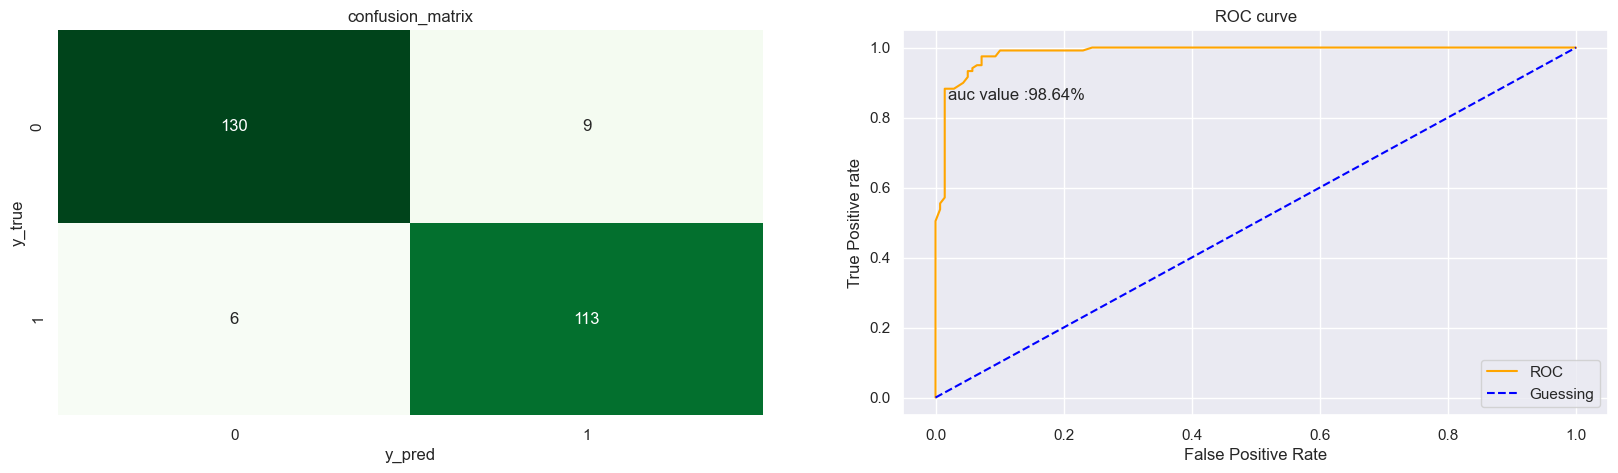

In [58]:
plt.subplot(121)
sns.heatmap(confusion_matrix(y_test,predicted),annot = True,cmap="Greens", fmt = ".0f",cbar=False)
plt.title("confusion_matrix")
plt.xlabel("y_pred")
plt.ylabel("y_true");
plt.subplot(122)
plot_roc_curve(fpr,tpr); 

---

### *C.5 Apply Clusters on the original dataset:*

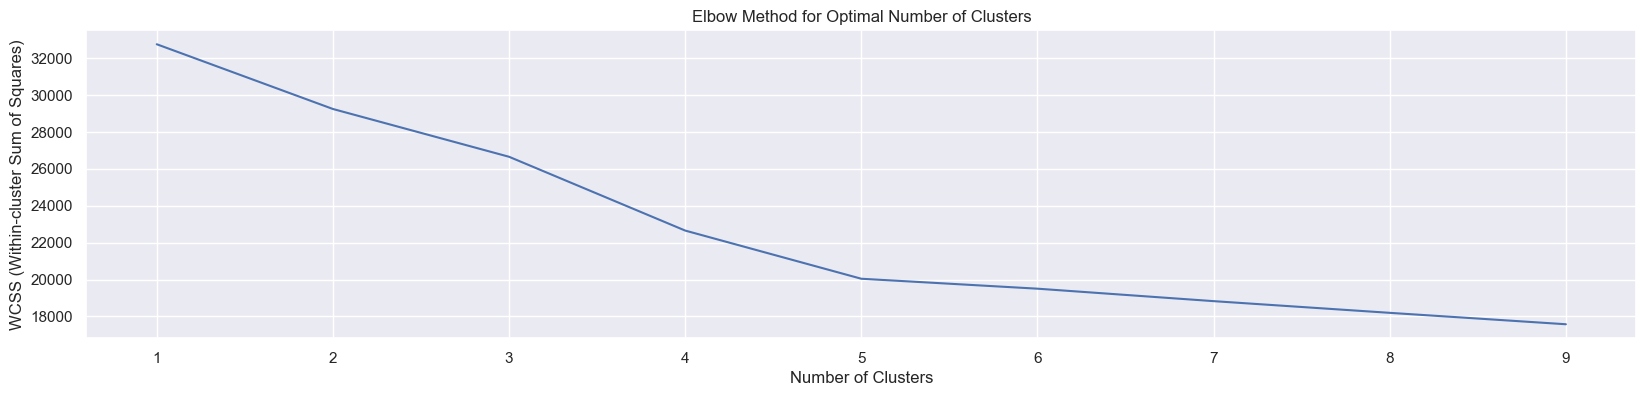

In [59]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20, 4))
plt.plot(range(1, 10), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Number of Clusters"); 

In [63]:
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(scaled_df)
df2=df.copy()
df2['clusters'] = clusters
df2.head()

,veh_value,exposure,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,clusters
14,16600.0,0.484600,1,669.509999,SEDAN,3,M,B,6,1
16,15100.0,0.993840,1,806.609999,SEDAN,3,F,F,4,2
17,7600.0,0.539357,1,401.805451,HBACK,3,M,C,4,1
40,18900.0,0.654346,2,1811.709997,STNWG,3,M,F,2,3
64,40600.0,0.851472,1,5434.439987,STNWG,2,M,F,3,4


In [79]:
df2["clusters"].value_counts().to_frame().sort_values(ascending=True,by="clusters")

,count
clusters,
0,170
1,1453
2,1961
3,284
4,750


In [78]:
df2.groupby("clusters")[['veh_value', 'exposure','claimcst0']].mean()

,veh_value,exposure,claimcst0
clusters,,,
0,18860.647059,0.421355,15716.337239
1,13850.492085,0.344110,1576.366853
2,14692.718001,0.804402,1337.278930
3,18635.785211,0.711311,2806.181142
4,38044.190667,0.626351,1219.780666
